#                                        Projet SMS Spam Filtering

                                                                                      Rushan Zamir Saeedullah  &  Berville Laurence

#  Introduction :

### Analyse du besoin

> Le service de messages courts (SMS) est le service de communication textuelle des systèmes de communication téléphonique, qu'un utilisateur peut utiliser pour communiquer avec d'autres utilisateurs. L'inconvénient, c'est que les téléphones portables sont en train de devenir la dernière cible du courrier électronique indésirable, avec un nombre croissant d'annonceurs  à utiliser les messages texte pour cibler leurs abonnés.  Pour le consommateur, le spam est un message indésirable, parfois répété, qui vise généralement à le tromper et à lui soutirer de l’argent par le biais d’une communication payante.

> Un modèle de prédiction en Python est un algorithme mathématique utilisé pour faire des prédictions ou des prévisions basées sur des données d'entrée. Il utilise l'apprentissage automatique ou des techniques statistiques pour analyser des données historiques et apprendre des modèles, qui peuvent ensuite être utilisés pour prédire des résultats ou des tendances futurs.

> Nous allons présenter ici nos travaux qui consistent en l'exploitation d'une base de donnée SMS, puis par la construction d'une application de détection de spam. Voici les étapes : 

- Exploration de la base de donnée SMS,

- Construction d'un pipeline de ML,

- Prétraitement des données,

- Entrainement, fine tuning,

- Et validation et sélection d'un modèle de classification.


### Mise en place de l'environnement 

- Acquisition des données et mise en forme

> 1- Une collection de 425 messages de spam SMS a été extraite manuellement du site web Grumbletext. Il s'agit d'un forum britannique dans lequel les utilisateurs de téléphones portables font des déclarations publiques sur les messages de spam SMS, la plupart du temps sans signaler l'incident. 

> 2- Egalement inclus dans le dataset, un sous-ensemble de 3 375 SMS, choisis au hasard dans le corpus NUS SMS, qui est un ensemble de données d'environ 10 000 messages légitimes collectés pour la recherche au département d'informatique de l'université nationale de Singapour. Les messages proviennent en grande partie de Singapouriens et surtout d'étudiants de l'université. Ces messages ont été collectés auprès de volontaires qui ont été informés que leurs contributions allaient être rendues publiques.

> 3- Une liste de 450 SMS spam recueillis dans la thèse de doctorat de Caroline Tag, disponible à l'adresse http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf.

> 4- Enfin, nous avons intégré le corpus SMS Spam v.0.1 Big. Il contient 1 002 SMS ham et 322 messages de spam et est accessible au public à l'adresse suivante : http://www.esp.uem.es/jmgomez/smsspamcorpus/.  

- Pour ce projet, nous allons utiliser les packages ci-dessous :

In [1]:
import matplotlib.pyplot as plt # Graphiques 
import seaborn as sns # Graphiques

from sklearn.pipeline import Pipeline # pour faire un pipeline
from sklearn.model_selection import train_test_split # pour diviser le dataset en training data set
from sklearn.feature_extraction.text import TfidfVectorizer # pour vectoriser les messages en matrice
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd # Gestion des dataframes
import numpy as np # Gestion des datasframes

import nltk# Preprocessing pour enlever ponctuation - Natural Language Processing 
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords # Preprocessing pour enlever les mots "courant"

import string # pour enlever les listes

import warnings
warnings.filterwarnings('ignore') # enlever les warnings de python



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


- Récupération des données :

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/SMSSpamCollection', 
         sep='\t', header=None)

- Renommer les colonnes :

Les données téléchargées consistent en 2 colonnes. Une avec la définition des messages comme "Spam" ou "Ham", renommée "Target". La seconde colonne contient le message, renommer "SMS".

In [3]:
data=data.rename(columns={0:"Target",1:"SMS"}) # Renommer les colonnes.

### Exploration de la base de donnée 

- Répartition des variables dans le data set.

> Dans les éléments suivants nous présentons quelques statistiques descriptives de l'ensemble de données. 

> En résumé, le dataset est composé de 4 825 messages légitimes et de 747 messages de spam mobile, soit un total de 5 572 messages. Nous constatons une forte disproportion entre les deux variables.

In [4]:
Ratio=data['Target'].value_counts()
Ratio= pd.DataFrame(Ratio)
Ratio

,Target
ham,4825
spam,747


In [5]:
DeepnoteChart(data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Target","scale":{"type":"linear"},"stack":"zero"},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Target","scale":{"scheme":"dark2"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

- Les doublons :

> Nous créons deux sous tableaux avec les données Ham et les données Spams. Puis, nous observons les messages. 

In [6]:
HamData = data[data['Target'] == "ham"]
print(HamData.head(5))

  Target                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
6    ham  Even my brother is not like to speak with me. ...


In [7]:
SpamData = data[data['Target'] == "spam"]
print(SpamData.head(5))

   Target                                                SMS
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...
5    spam  FreeMsg Hey there darling it's been 3 week's n...
8    spam  WINNER!! As a valued network customer you have...
9    spam  Had your mobile 11 months or more? U R entitle...
11   spam  SIX chances to win CASH! From 100 to 20,000 po...


> Pour compter les spams et les observer.

In [8]:
HamData_counts= pd.DataFrame(HamData['SMS'].value_counts())# il y a des duplicats
HamData_counts

,SMS
"Sorry, I'll call later",30
I cant pick the phone right now. Pls send a message,12
Ok...,10
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4
...,...
S:)but he had some luck.2 catches put down:),1
I have lost 10 kilos as of today!,1
Havent shopping now lor i juz arrive only,1
How long does applebees fucking take,1


In [9]:
SpamData_counts= pd.DataFrame(SpamData['SMS'].value_counts())# il y a des duplicats
SpamData_counts

,SMS
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!,4
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.,3
HMV BONUS SPECIAL 500 pounds of genuine HMV vouchers to be won. Just answer 4 easy questions. Play Now! Send HMV to 86688 More info:www.100percent-real.com,3
"Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'",3
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+,3
...,...
Your unique user ID is 1172. For removal send STOP to 87239 customer services 08708034412,1
dating:i have had two of these. Only started after i sent a text to talk sport radio last week. Any connection do you think or coincidence?,1
"Urgent! call 09066350750 from your landline. Your complimentary 4* Ibiza Holiday or 10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150 ppm 18+",1
"TheMob> Check out our newest selection of content, Games, Tones, Gossip, babes and sport, Keep your mobile fit and funky text WAP to 82468",1


>  Il y a par exemple 30 messages identiques dans les "Hams".

> Avec".describe", nous pouvons observer les statistiques descriptives : 

In [10]:
HamData_counts.describe()

,SMS
count,4516.000000
mean,1.068423
std,0.563539
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,30.000000


In [11]:
SpamData_counts.describe()

,SMS
count,653.000000
mean,1.143951
std,0.384653
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


> Nous pouvons émettre trois hypothèses, à propos de la présence des doublons. 

>             1-  Comme nous l'avons noté dans l'introduction, il y a plusieurs datasets qui ont été combinés pour créer un, et donc certains messages sont en double (ou plus).  

>             2- Les messages spams ont été envoyés à plusieurs personnes et ensuite déclarés plusieurs fois par les utilisateurs. 

>             3- Le type de message, comme "ok", et souvent utilisés pas les rédacteurs de sms. 

> Dans les deux premiers cas, nous considérons que les doublons doivent être retirés, mais pas dans le 3e cas. Dans le pipeline nous allons donc utiliser deux datasets. Un avec les doublons et l'autre sans.

- Nous souhaitons ensuite compter le nombre moyen de mot dans un spam et un ham.

In [12]:
HamData["Number of Words"] = HamData["SMS"].apply(
    lambda n: len(n.split()))
mean_Ham = HamData["Number of Words"].mean()

In [13]:
SpamData["Number of Words"] = SpamData['SMS'].apply(
    lambda n: len(n.split()))
mean_Spam = SpamData["Number of Words"].mean()

### Explorations graphiques

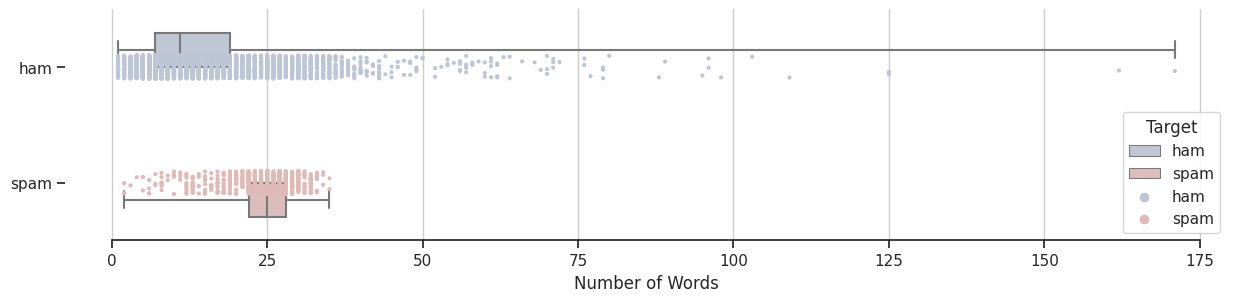

In [14]:
data["Number of Words"] = data["SMS"].apply(lambda n: len(n.split()))

sns.set_theme(style="ticks")# theme de la page. 
f, ax = plt.subplots(figsize=(15, 3)) # taille de la page et initialisation de la figure

# Plot the orbital period with horizontal boxes
sns.boxplot(
    data, 
    x="Number of Words", #Variable x
     y="Target",  # variable y
     hue="Target",
    whis=[0, 100], 
    width=.6, # taille des boxplot
    palette="vlag") # couleurs

# Rajouter les points de chaque observation. 
sns.stripplot(data, x="Number of Words",
                y="Target", 
                hue= "Target",
                size=3, # taille des points
                palette="vlag", # couleurs des points
                color=".5") # transparence

# Tweak the visual presentation
ax.xaxis.grid(True)# rajouter des grilles en background (x)
ax.set(ylabel="") # pas de titre pour l'axe y
sns.despine(trim=True, left=True)

> Nous notons que les hams ont des longueurs qui semblent plus variées, mais avec une moyenne plus faible que les spams.

# Preprocessing 

### Enlever la ponctuation et les stopwords.

> En recherche d'information, un mot vide (ou stop word, en anglais) est un mot qui est tellement commun qu'il est inutile de l'indexer ou de l'utiliser dans une recherche. En d'autres termes, un mot qui apparaît avec une fréquence semblable dans chacun des textes de la collection n'est pas discriminant car il ne permet pas de distinguer les textes les uns par rapport aux autres.  Ex : ‘the’, ‘and’, ‘I’, “a”, “an”, “the”, et “of”

In [15]:
stop_words = list(stopwords.words('english'))
print(len(stop_words),stop_words)

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

> Nous allons donc enlever 179 stopwords. Puis les ponctuations. 

In [16]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
def text_process(text): # pour enlever les mots les plus courants et la ponctuation des messages
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [18]:
df= pd.DataFrame(data['SMS'].apply(text_process))

In [19]:
label = pd.DataFrame(data['Target']) # Colonne avec que les Targets
df= pd.concat([label, df],axis=1) 

### Enlever les doublons

> Nous allons enlever les doublons. Puis, compter le nombre de mot dans les messages. 

In [20]:
df = df.drop_duplicates()# enlever les doublons

In [21]:
df["Nb_Words"] = df["SMS"].apply(lambda n: len(n.split()))
df.head(5)

,Target,SMS,Nb_Words
0,ham,Go jurong point crazy Available bugis n great ...,16
1,ham,Ok lar Joking wif u oni,6
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,23
3,ham,U dun say early hor U c already say,9
4,ham,Nah dont think goes usf lives around though,8


### Déclarer et encoder la target

In [22]:
from sklearn.preprocessing import LabelEncoder
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(df['Target'])

In [23]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Déclarer les features

In [24]:
X=pd.DataFrame(df['SMS'])
X.head(3)

,SMS
0,Go jurong point crazy Available bugis n great ...
1,Ok lar Joking wif u oni
2,Free entry 2 wkly comp win FA Cup final tkts 2...


### Conversion de mots en vecteurs : Feature extraction

> Nous pouvons convertir les mots en vecteurs en utilisant soit le vecteur de comptage, soit le vecteur TF-IDF.

> Le TF-IDF (de l'anglais term frequency-inverse document frequency) est meilleur que les vecteurs de comptage car il ne se concentre pas seulement sur la fréquence des mots présents dans le corpus, mais fournit également l'importance des mots. Nous pouvons alors supprimer les mots qui sont moins importants pour l'analyse, ce qui rend la construction du modèle moins complexe en réduisant les dimensions d'entrée.

In [25]:
# target preprocessing
tfidf_vectorizer  = TfidfVectorizer(use_idf=False, 
                                        lowercase=True, 
                                        strip_accents='ascii')
                                        #,stop_words=stop_words) # enlever les stopwords

# Train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data['SMS'], 
                                                    data['Target'],
                                                    test_size=0.20,# 20% test size et 80% train
                                                    random_state=42,
                                                    stratify=data['Target']) #

In [27]:
X_train.shape

(4457,)

In [28]:
y_train.shape

(4457,)

In [29]:
y_test.shape

(1115,)

In [30]:
X_test.shape

(1115,)

# Modèles

## Classification à l'aide de classificateurs de Sklearn

> Dans cette étape, nous allons utiliser certains des classificateurs les plus populaires et comparer leurs résultats.

- Classification des spams à l'aide de la régression logistique

- Classification des spams à l'aide de SVM

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.svm import SVC

- Classification des spams à l'aide de la méthode des bayes naïves

- Classification des spams à l'aide d'un arbre de décision

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
from sklearn.tree import DecisionTreeClassifier

- Classification des spams à l'aide de K-Nearest Neighbor (KNN)

- Classification des spams à l'aide d'un Random Forest Classifier.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

> Nous allons tester les 6 modèles :

In [37]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

## Pipelines

> Nous déclarons, ci-dessous les 6 modèles :

In [38]:
SVC_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', svc)
 ])

In [39]:
KNC_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier',knc )
 ])

In [40]:
SVC_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(strip_accents='ascii', use_idf=False)),
                ('classifier', SVC(gamma=1.0, kernel='sigmoid'))])

In [41]:
KNC_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(strip_accents='ascii', use_idf=False)),
                ('classifier', KNeighborsClassifier(n_neighbors=49))])

In [42]:
MNB_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', mnb)
 ]).fit(X_train, y_train)

In [43]:
DTC_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', dtc)
 ]).fit(X_train, y_train)

In [44]:
LRC_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', lrc)
 ]).fit(X_train, y_train)

In [45]:
RFC_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', rfc)
 ]).fit(X_train, y_train)

# Prédictions sur les données du X-test set

> Nous allons calculer "l'accuracy score" de chaque modèle.   L’accuracy permet de décrire la performance du modèle sur les individus positifs et négatifs de façon symétrique. Elle mesure le taux de prédictions correctes sur l’ensemble des individus.

In [46]:
y_pred_SVC = SVC_vectorizer.predict(X_test)
print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_test,y_pred_SVC):.3f}")

Train Accuracy using Count Vectorizer: 0.979


In [47]:
y_pred_KNC = KNC_vectorizer.predict(X_test)
print(f"Train Accuracy using Count Vectorizer:{accuracy_score(y_test,y_pred_KNC):.3f}")

Train Accuracy using Count Vectorizer:0.952


In [48]:
y_pred_MNB = MNB_vectorizer.predict(X_test)
print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_test,y_pred_MNB):.3f}")

Train Accuracy using Count Vectorizer: 0.978


In [49]:
y_pred_DTC = DTC_vectorizer.predict(X_test)
print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_test,y_pred_DTC):.3f}")

Train Accuracy using Count Vectorizer: 0.963


In [50]:
y_pred_LRC = LRC_vectorizer.predict(X_test)
print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_test,y_pred_LRC):.3f}")

Train Accuracy using Count Vectorizer: 0.970


In [51]:
y_pred_RFC = RFC_vectorizer.predict(X_test)
print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_test,y_pred_RFC):.3f}")

Train Accuracy using Count Vectorizer: 0.973


# Rapports de la classification

### Les métriques d'erreurs

> La précision et le recall sont deux métriques essentielles en classification, du fait de leur robustesse et de leur interprétabilité. La précision (precision en anglais) et le rappel (recall en anglais) sont deux métriques pour évaluer la performance des modèles de classification à 2 classes ou plus. Ces métriques sont basées sur la matrice de confusion.

> La précision est également appelée Positive Predictive Value. Elle correspond au taux de prédictions correctes parmi les prédictions positives. Elle mesure la capacité du modèle à ne pas faire d’erreur lors d’une prédiction positive.

> Le recall est également appelé sensitivity (sensibilité), true positive rate ou encore hit rate (taux de détection). Il correspond au taux d’individus positifs détectés par le modèle.

> Le F1-score évalue la capacité d’un modèle de classification à prédire efficacement les individus positifs, en faisant un compromis entre la précision et le recall. Le F1-score permet de résumer les valeurs de la précision et du recall en une seule métrique.

In [52]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [53]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.64      0.78       149

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [54]:
print(classification_report(y_test, y_pred_MNB))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       966
        spam       0.89      0.83      0.86       149

    accuracy                           0.96      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115



In [56]:
print(classification_report(y_test, y_pred_LRC))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       966
        spam       0.96      0.81      0.88       149

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [57]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### Matrices de confusion

> Les nombres en diagonale sont liés aux prédictions correctes, tandis que les nombres hors diagonale sont liés aux prédictions incorrectes (mauvaises classifications). Nous connaissons maintenant les quatre types de prédictions correctes et erronées :

> Le coin inférieur droit correspond aux vrais positifs (TP), c'est-à-dire aux spam qui ont  ont été prédites comme telles par le classificateur;

> Le coin supérieur gauche est constitué de vrais négatifs (TN) et correspond aux hams qui ont été prédits comme telles par le classificateur ;

> Le coin inférieur gauche correspond aux faux négatifs (FN) et correspond aux spams mais qui ont été prédits comme hams ;

> Le coin supérieur droit correspond aux faux positifs (FT) et correspond aux hams mais qui ont été prédits comme spams.

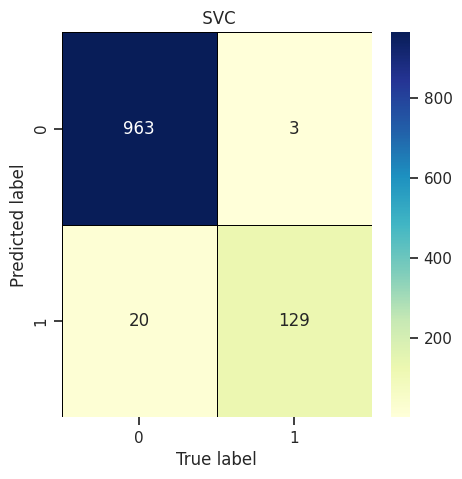

In [58]:
cm = confusion_matrix(y_test,y_pred_SVC)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,
            linewidths=0.6,
            linecolor="black",
            fmt = ".0f",
            cmap="YlGnBu",
            ax=ax)
plt.xlabel("True label")
plt.ylabel("Predicted label")
ax.set_title(' SVC')
plt.show()

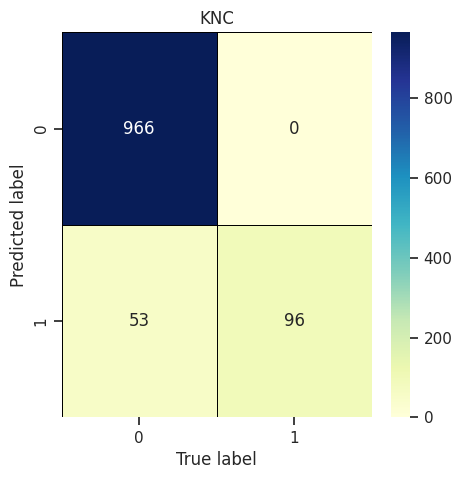

In [59]:
cm = confusion_matrix(y_test,y_pred_KNC)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,
            linewidths=0.5,
            linecolor="black",
            fmt = ".0f",
            cmap="YlGnBu",
            ax=ax)
plt.xlabel("True label")
plt.ylabel("Predicted label")
ax.set_title('KNC')
plt.show()

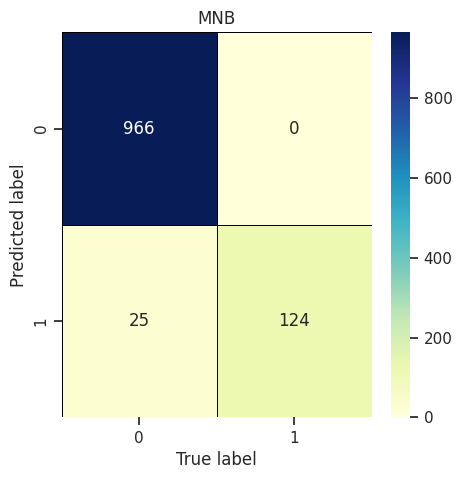

In [60]:
cm = confusion_matrix(y_test,y_pred_MNB)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,
            linewidths=0.5,
            linecolor="black",
            fmt = ".0f",
            cmap="YlGnBu",
            ax=ax)
plt.xlabel("True label")
plt.ylabel("Predicted label")
ax.set_title('MNB')
plt.show()  

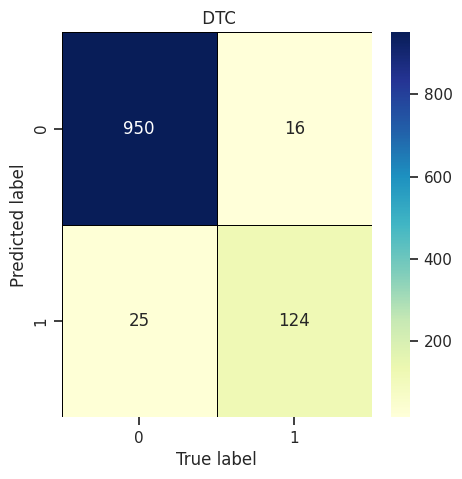

In [61]:
cm = confusion_matrix(y_test,y_pred_DTC)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,
            linewidths=0.5,
            linecolor="black",
            fmt = ".0f",
            cmap="YlGnBu",
            ax=ax)
plt.xlabel("True label")
plt.ylabel("Predicted label")
ax.set_title(' DTC')
plt.show()

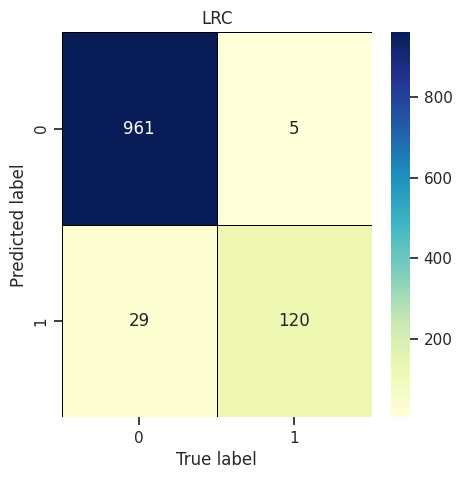

In [62]:
cm = confusion_matrix(y_test,y_pred_LRC)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,
            linewidths=0.5,
            linecolor="black",
            fmt = ".0f",
            cmap="YlGnBu",
            ax=ax)
plt.xlabel("True label")
plt.ylabel("Predicted label")
ax.set_title('LRC')
plt.show()

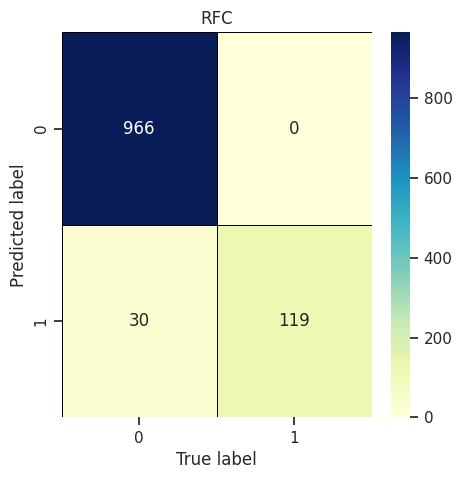

In [63]:
cm = confusion_matrix(y_test,y_pred_RFC)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,
            linewidths=0.5,
            linecolor="black",
            fmt = ".0f",
            cmap="YlGnBu",
            ax=ax)
plt.xlabel("True label")
plt.ylabel("Predicted label")
ax.set_title('RFC')
plt.show()

# Comparaison des models

In [64]:
Classifier = [svc, knc,  mnb,dtc, lrc, rfc]
Accuracy=(accuracy_score(y_test,y_pred_SVC),
            accuracy_score(y_test,y_pred_KNC),
            accuracy_score(y_test,y_pred_MNB),
            accuracy_score(y_test,y_pred_DTC), 
            accuracy_score(y_test,y_pred_LRC),
            accuracy_score(y_test,y_pred_RFC))

In [65]:
df = pd.DataFrame( Accuracy,
             index =  ["svc", "knc",  "mnb","dtc",
              "lrc", "rfc"])
df = df.reset_index()
df=df.rename(columns={0:"Valeur", "index":"Model"}) # Renommer le nom des variables
df

,Model,Valeur
0,svc,0.979372
1,knc,0.952466
2,mnb,0.977578
3,dtc,0.963229
4,lrc,0.969507
5,rfc,0.973094


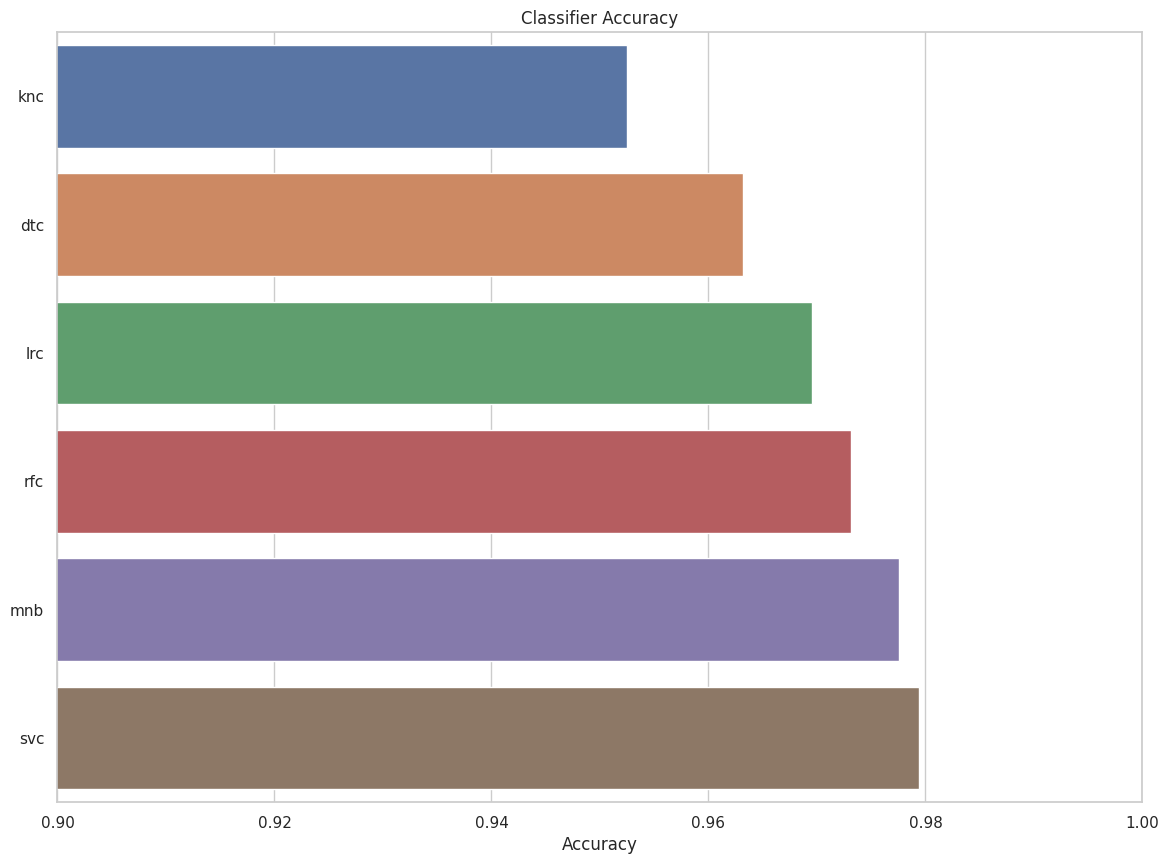

In [66]:
fig = plt.figure(figsize=(14, 10)) 
orderedA= df.sort_values(by='Valeur')# ordination
sns.set_theme(style="whitegrid")
sns.barplot(x="Valeur",y="Model",data=orderedA)
plt.xlim([0.9, 1]) 
plt.xlabel('Accuracy')
plt.ylabel('')
plt.title('Classifier Accuracy')
plt.show()

# Cross Validation & Grid Search pour le Machine Learning

> Amélioration des deux meilleurs modèles avec GridCV. 

In [67]:
data1 = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/SMSSpamCollection', 
         sep='\t', header=None)
data1=data1.rename(columns={0:"Target",1:"SMS"}) # Renommer les colonnes.

In [68]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV # importation du package GridSearchCV

# Categorical variables
from sklearn.compose import ColumnTransformer


Nous labellisons les features et la target, puis nous divisons le data set en train set et test set. 

In [69]:
X=data1.drop('Target',axis=1) # serie
y=data1['Target']# serie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0,stratify=y)

### Les deux modèles étudiés : 

> Support Vector Machine : SVC

>  Multinomial naive Bayes algorithm : mnb

In [70]:
svc = svm.SVC(kernel= 'sigmoid', gamma=1.0)
mnb = MultinomialNB()

### Les paramètres : 

In [71]:
parameters = {'model__kernel':['sigmoid','linear'],
             'model__C':[5,6,7,8]} # C-Support Vector Classification

In [72]:
alphas = [0.1,  0.3,  0.5,  0.7,  0.9, 1.0]
parameters_mnb = {'model__alpha': alphas, 'model__fit_prior' : [True, False]}

### Transformer et pipelines :

In [73]:
transformer = ColumnTransformer(
    transformers=[
        (
        'data_vectorisation',TfidfVectorizer(use_idf=False, 
                                        lowercase=True, 
                                         strip_accents='ascii',
                                        stop_words=stop_words),
         'SMS')
    ])

In [74]:
pipe = Pipeline(steps =[
                        ('vectorizer', transformer), # 
                        ('model', svc)
     ])

In [75]:
pipe_mnb = Pipeline(steps =[
                        ('vectorizer', transformer), # 
                        ('model', mnb)
     ])

### GridSearch fit

In [76]:
clf = GridSearchCV(pipe, parameters) # 

In [77]:
clf_mnb = GridSearchCV(pipe_mnb, parameters_mnb) # 

In [78]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 ColumnTransformer(transformers=[('data_vectorisation',
                                                  TfidfVectorizer(stop_words=['i',
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                                                                              "she's",
                                                                              'her',
                                                                              'hers',
                                                                              'herself',
                                                                              'it',
                                                                              "it's",
                                                                              'its',
                                                                              'itself', ...],
                                                                  strip_accents='ascii',
                                                                  use_idf=False),
                                                  'SMS')])),
                ('model', SVC(gamma=1.0, kernel='sigmoid'))])

In [79]:
pipe_mnb.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 ColumnTransformer(transformers=[('data_vectorisation',
                                                  TfidfVectorizer(stop_words=['i',
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                                                                              "she's",
                                                                              'her',
                                                                              'hers',
                                                                              'herself',
                                                                              'it',
                                                                              "it's",
                                                                              'its',
                                                                              'itself', ...],
                                                                  strip_accents='ascii',
                                                                  use_idf=False),
                                                  'SMS')])),
                ('model', MultinomialNB())])

In [80]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('vectorizer',
                                        ColumnTransformer(transformers=[('data_vectorisation',
                                                                         TfidfVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
                                                                                                     "she's",
                                                                                                     'her',
                                                                                                     'hers',
                                                                                                     'herself',
                                                                                                     'it',
                                                                                                     "it's",
                                                                                                     'its',
                                                                                                     'itself', ...],
                                                                                         strip_accents='ascii',
                                                                                         use_idf=False),
                                                                         'SMS')])),
                                       ('model',
                                        SVC(gamma=1.0, kernel='sigmoid'))]),
             param_grid={'model__C': [5, 6, 7, 8],
                         'model__kernel': ['sigmoid', 'linear']})

In [81]:
clf_mnb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('vectorizer',
                                        ColumnTransformer(transformers=[('data_vectorisation',
                                                                         TfidfVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
                                                                                                     "she's",
                                                                                                     'her',
                                                                                                     'hers',
                                                                                                     'herself',
                                                                                                     'it',
                                                                                                     "it's",
                                                                                                     'its',
                                                                                                     'itself', ...],
                                                                                         strip_accents='ascii',
                                                                                         use_idf=False),
                                                                         'SMS')])),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                         'model__fit_prior': [True, False]})

In [82]:
grid = GridSearchCV(pipe, parameters, cv = 5, n_jobs =-1, verbose = 1)

In [83]:
grid_mnb = GridSearchCV(pipe_mnb, parameters_mnb, cv = 5, n_jobs =-1,scoring = 'roc_auc', verbose = 1)

In [84]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        ColumnTransformer(transformers=[('data_vectorisation',
                                                                         TfidfVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
                                                                                                     "she's",
                                                                                                     'her',
                                                                                                     'hers',
                                                                                                     'herself',
                                                                                                     'it',
                                                                                                     "it's",
                                                                                                     'its',
                                                                                                     'itself', ...],
                                                                                         strip_accents='ascii',
                                                                                         use_idf=False),
                                                                         'SMS')])),
                                       ('model',
                                        SVC(gamma=1.0, kernel='sigmoid'))]),
             n_jobs=-1,
             param_grid={'model__C': [5, 6, 7, 8],
                         'model__kernel'

In [85]:
grid_mnb.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        ColumnTransformer(transformers=[('data_vectorisation',
                                                                         TfidfVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
                                                                                                     "she's",
                                                                                                     'her',
                                                                                                     'hers',
                                                                                                     'herself',
                                                                                                     'it',
                                                                                                     "it's",
                                                                                                     'its',
                                                                                                     'itself', ...],
                                                                                         strip_accents='ascii',
                                                                                         use_idf=False),
                                                                         'SMS')])),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                         'model__fit_prior': [True, False]},
             s

In [86]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__vectorizer', 'estimator__model', 'estimator__vectorizer__n_jobs', 'estimator__vectorizer__remainder', 'estimator__vectorizer__sparse_threshold', 'estimator__vectorizer__transformer_weights', 'estimator__vectorizer__transformers', 'estimator__vectorizer__verbose', 'estimator__vectorizer__verbose_feature_names_out', 'estimator__vectorizer__data_vectorisation', 'estimator__vectorizer__data_vectorisation__analyzer', 'estimator__vectorizer__data_vectorisation__binary', 'estimator__vectorizer__data_vectorisation__decode_error', 'estimator__vectorizer__data_vectorisation__dtype', 'estimator__vectorizer__data_vectorisation__encoding', 'estimator__vectorizer__data_vectorisation__input', 'estimator__vectorizer__data_vectorisation__lowercase', 'estimator__vectorizer__data_vectorisation__max_df', 'estimator__vectorizer__data_vectorisation__max_features', 'estimator__vectorizer__data_vectorisa

In [87]:
grid_mnb.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__vectorizer', 'estimator__model', 'estimator__vectorizer__n_jobs', 'estimator__vectorizer__remainder', 'estimator__vectorizer__sparse_threshold', 'estimator__vectorizer__transformer_weights', 'estimator__vectorizer__transformers', 'estimator__vectorizer__verbose', 'estimator__vectorizer__verbose_feature_names_out', 'estimator__vectorizer__data_vectorisation', 'estimator__vectorizer__data_vectorisation__analyzer', 'estimator__vectorizer__data_vectorisation__binary', 'estimator__vectorizer__data_vectorisation__decode_error', 'estimator__vectorizer__data_vectorisation__dtype', 'estimator__vectorizer__data_vectorisation__encoding', 'estimator__vectorizer__data_vectorisation__input', 'estimator__vectorizer__data_vectorisation__lowercase', 'estimator__vectorizer__data_vectorisation__max_df', 'estimator__vectorizer__data_vectorisation__max_features', 'estimator__vectorizer__data_vectorisa

### Resultats

In [88]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_model__C',
 'param_model__kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [89]:
sorted(grid_mnb.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_model__alpha',
 'param_model__fit_prior',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [90]:
grid.best_score_

0.9863140623977694

In [91]:
grid_mnb.best_score_

0.992446927343883

In [92]:
grid.best_params_

{'model__C': 5, 'model__kernel': 'linear'}

In [93]:
grid_mnb.best_params_

{'model__alpha': 0.1, 'model__fit_prior': True}

In [94]:
print(f"Le best score est : {grid_mnb.best_score_:.3f}")

Le best score est : 0.992


### Conclusion :

Ici, le meilleur modèle est le Multinomial naive Bayes algorithme, avec un parametre alpha de 0.1.

# Prédictions 

Nous allons ici utiliser le model ayant le meilleur résultat : SVC

In [ ]:
print ('Veuillez entrer votre sms suspect : ')
new_sms =input()

Veuillez entrer votre sms suspect : 


In [ ]:
prediction = SVC_vectorizer.predict([new_sms])

if prediction[0] == "spam":
    print("This sms is spam.")
else:
    print("This sms is not spam.")

This sms is not spam.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=045f24f0-4b05-4146-8b0b-9698e51dd224' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>